İLK Problemimiz K-Means tamam ama Kümeleme problemleri sadece K-Means'ten ibaret değil.. 

Aşağıdaki Sitelere bakmakta ve o algoritmalara da göz atmakta fayda var.

https://scikit-learn.org/stable/modules/clustering.html


K-Means için daha detaylı 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Parametrelerimizden bazıları şunlardır:

n_clusters=8 default değeri 8.. kaç tane kümeleme yapmak istiyorsak yazmalıyız.


init = {‘k-means++’, ‘random’} olarak geçiyor k-means++ 'ı anlamıştık.

random_state= nereden başlayacağı ile ilgilii bu parametre x_test,x_train değerlerinde de vardı...



AYRICA DİĞER ALGORİTMALARI HANGİ VERİLERİ NASIL BİR ŞEKİLDE DAĞITTIĞINI DA GÖRMEK İSTERSENİZ :




https://huggingface.co/spaces/scikit-learn/clustering


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Data'nın çekilmesi


In [101]:
veriler = pd.read_csv('C:/Users/yusuf/Desktop/GOALS/MACHINE LEARNING/Basic/kaynaklar/musteriler.csv')

veriler.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [102]:
x= veriler.iloc[:,2:4].values
x

array([[    60,  69900],
       [    30,  79000],
       [    52,  85500],
       [    57,  17100],
       [    55,   5500],
       [    68,  27200],
       [    41,  20500],
       [    20,  69000],
       [    33,  13200],
       [    37,  31800],
       [    33,  59200],
       [    21,  95800],
       [    48,  46200],
       [    46,  29800],
       [    68,  83000],
       [    35, 143500],
       [    72,  91300],
       [    20,   9800],
       [    26,  79500],
       [    60,  66400],
       [    49,  25900],
       [    22,      0],
       [    41,  90900],
       [    30,  51800],
       [    56, 126800],
       [    56,  40800],
       [    66,  26400],
       [    45,  76100],
       [    29,  26500],
       [    32,  37200],
       [    20,   4000],
       [    32,  34500],
       [    63,  47100],
       [    60,  95600],
       [    23,  35400],
       [    29,  41100],
       [    70,  46400],
       [    61,  10400],
       [    48,  50100],
       [    66, 111300],


## K-MEANS 

n_clusters kaç tane küme olacağı 


init'i zaten ya random ya da k-means++ olarak yazmıştık


random_state ise nereden başlayacağı veya rastgelilik sayısı da diyebiliriz

In [103]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,init="k-means++")

kmeans.fit(x)

kmeans.cluster_centers_ #merkezlerinin nerede oluşturduğuna bakalım





    

array([[4.42608696e+01, 5.86434783e+04],
       [5.77391304e+01, 1.04386957e+05],
       [4.14235294e+01, 2.20694118e+04]])

DERSTE DE ANLATTIĞIMIZ GİBİ K İÇİN OPTİMUM DEĞER DENEYEREK BULUNUR


Bir AI Uzmanı veya Veri Bilimci bunu şöyle okur..

EN BÜYÜK DÜŞÜŞ Yaşayan yer bizim için ideal kümeleme değeridir.

In [104]:
sonuclar=[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i,init="k-means++",random_state=7)
    kmeans.fit(x)
    sonuclar.append(kmeans.inertia_) # kmeans.inertia_ aslında bizim WCSS değerlerimiz.

sonuclar

c:\Users\yusuf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[241761426840.19498,
 68604612132.47226,
 36852754776.64554,
 19205646967.399178,
 12415064105.15978,
 8162831945.783776,
 6261146162.340532,
 4805616979.938422,
 3827880238.666803]

## Görselleştirme İşlemi

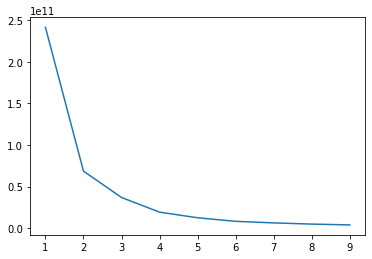

In [105]:
plt.plot(range(1,10),sonuclar)

## Agglomerative Clustering (Historical Clustering)

DAHA FAZLA PARAMETRE VE DETAYLISI İÇİN :


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [106]:
from sklearn.cluster import AgglomerativeClustering
ag= AgglomerativeClustering(n_clusters=4,linkage='complete',affinity='manhattan') #n_clusters default olarak 2 verir. ,kaç tane kümeleme istediğimizi soruyoruz
#ecludian kullanıyorsanız eğer mesafe ölçümü için linkage olarak sadece ward'ı kullanabilirsiniz.

ag_tahmin=ag.fit_predict(x)
ag_tahmin


array([2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 3, 1, 0, 2, 2, 0, 0,
       1, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0,
       0, 0, 0, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 1, 0, 2, 3, 1, 2, 0, 2, 0,
       2, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 3, 2, 2, 0,
       0, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 0, 0, 3, 2, 0, 0, 2, 1, 0, 2, 3,
       3, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 3, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 3, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0,
       0, 2, 1, 2, 2, 2, 2, 3, 1, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0,
       0, 2], dtype=int64)

CLUSTER'LARIN GÖSTERİMİ 

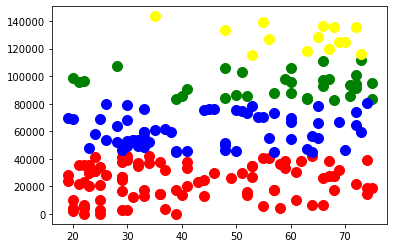

In [107]:
plt.scatter(x[ag_tahmin==0,0],x[ag_tahmin==0,1],c='red',s=100)
plt.scatter(x[ag_tahmin==1,0],x[ag_tahmin==1,1],c='green',s=100)
plt.scatter(x[ag_tahmin==2,0],x[ag_tahmin==2,1],c='blue',s=100)
plt.scatter(x[ag_tahmin==3,0],x[ag_tahmin==3,1],c='yellow',s=100)

Hep Sci-kit Learn kütüphanesini kullanıyoruz ancak şimdi yeni bir kütüphane ile tanışıcaz.. O da çok kullanışlı bir kütüphane


https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#


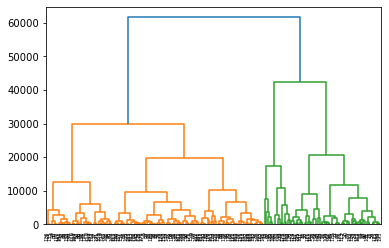

In [108]:
import scipy.cluster.hierarchy as sch 

dendogram = sch.dendrogram(sch.linkage(x, method='average')) #bunun kullanımını fonksiyonun içinden bakalabilirsin (parametreler,özellikleri vs..)

plt.show()

Biraz parametrelerle oynayalım


İlk başta affinity= ward olarak linkage= eucliadan olarak ayarladık..



İkinci olarak -- linkage='average',affinity='manhattan'olarak ayarladık..


Üçüncü linkage complete affinity='manhattan'olarak ayarladık.